In [1]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D,Input
from tensorflow.keras.models import Sequential
import os

import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from tqdm import tqdm
import tensorflow as tf
import cv2

In [2]:
DIR_PATH = "../Face Images/"
HEIGHT = 128
WIDTH = 128
CHANNELS = 3

In [31]:
name_images = [name for name in os.listdir(DIR_PATH) if name != '.DS_Store']
images = np.zeros((len(name_images),HEIGHT,WIDTH,CHANNELS),dtype=np.float32)

for n,name_image in tqdm(enumerate(name_images),total=len(name_images)):
    path_image = os.path.join(DIR_PATH, name_image)
    img = imread(path_image)
    assert img.shape ==  (128,128,3)
    resized_img = cv2.resize(img, (HEIGHT , WIDTH))
    images[n] = resized_img/255


100%|██████████| 4480/4480 [00:06<00:00, 672.73it/s]


In [32]:
split_ratio = 0.8
split_index = int(images.shape[0] * split_ratio)
X_train = images[:split_index]
X_test = images[split_index:]

In [33]:
def add_noise_and_clip(data, noise_factor=0.5):
    noisy_data = np.zeros_like(data)
    for i in tqdm(range(len(data)),total = len(data)):
        noisy_sample = data[i] + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data[i].shape)
        noisy_data[i] = np.clip(noisy_sample, 0., 1.)
    return noisy_data

In [34]:
## Adding Gaussian Noise
X_train_noisy = add_noise_and_clip(X_train)
X_test_noisy = add_noise_and_clip(X_test)

100%|██████████| 896/896 [00:00<00:00, 1089.94it/s]


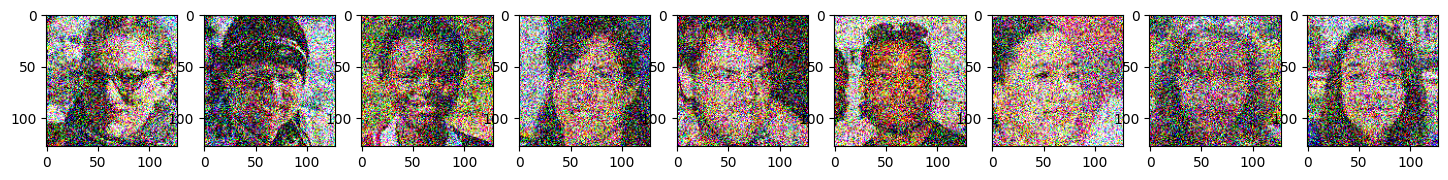

In [35]:
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(X_test_noisy[i])
plt.show()

In [187]:
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100,
    decay_rate=0.96,
    staircase=True)


In [188]:
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow.keras.layers import Dense, LeakyReLU

from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, LeakyReLU, MaxPooling2D, UpSampling2D, Dropout

model = Sequential()
#32 is the number of filters!
model.add(Input(shape=(HEIGHT, WIDTH, CHANNELS))),  # Adjust the shape according to your needs
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPooling2D((2, 2), padding='same')) # the resolution decrease when using MaxPool!

model.add(Conv2D(8, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPooling2D((2, 2), padding='same'))



model.add(Conv2D(8, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

# Compile the model
optimizer = tf.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Summary of the model
model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_89 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_42 (LeakyReLU)      │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_90 (Conv2D)              │ (None, 64, 64, 8)      │         2,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 64, 64, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_43 (LeakyReLU)      │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 32, 32, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_91 (Conv2D)              │ (None, 32, 32, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 32, 32, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_44 (LeakyReLU)      │ (None, 32, 32, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_32 (UpSampling2D) │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_92 (Conv2D)              │ (None, 64, 64, 32)     │         2,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_45 (LeakyReLU)      │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_33 (UpSampling2D) │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_93 (Conv2D)              │ (None, 128, 128, 3)    │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,315 (28.57 KB)

 Trainable params: 7,155 (27.95 KB)

 Non-trainable params: 160 (640.00 B)

In [189]:
## let's introduce the Modelcheckpoint to save the best model for each epoch to avoid errors
checkpointer = tf.keras.callbacks.ModelCheckpoint('Autoencoder_for_Denoising.keras', verbose=1, save_best_only=True)
## let's implement the EarlyStopping!
callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss')]

In [190]:
# Define a simple data generator
def data_generator(X_data, y_data, batch_size):
    while True:  # Loop indefinitely
        for i in range(0, len(X_data), batch_size):
            yield X_data[i:i + batch_size], y_data[i:i + batch_size]

batch_size = 8
train_gen = data_generator(X_train_noisy, X_train, batch_size)
val_gen = data_generator(X_test_noisy, X_test, batch_size)

In [ ]:
history = model.fit(
    x=train_gen,
    steps_per_epoch=len(X_train_noisy) // batch_size,
    epochs=100,
    verbose=1,
    validation_data=val_gen,
    validation_steps=len(X_test_noisy) // batch_size,
    shuffle=True,
    callbacks=callbacks
)

In [192]:
## The MSE Loss for the test is  0.01043696142733097 with 4x4
MSE = model.evaluate(X_test_noisy, X_test)
print("The MSE Loss for the test is ", MSE)

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0062
The MSE Loss for the test is  0.006144764833152294


In [193]:
no_noise_img = model.predict(X_test_noisy)
no_noise_img[0].shape

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step


(128, 128, 3)

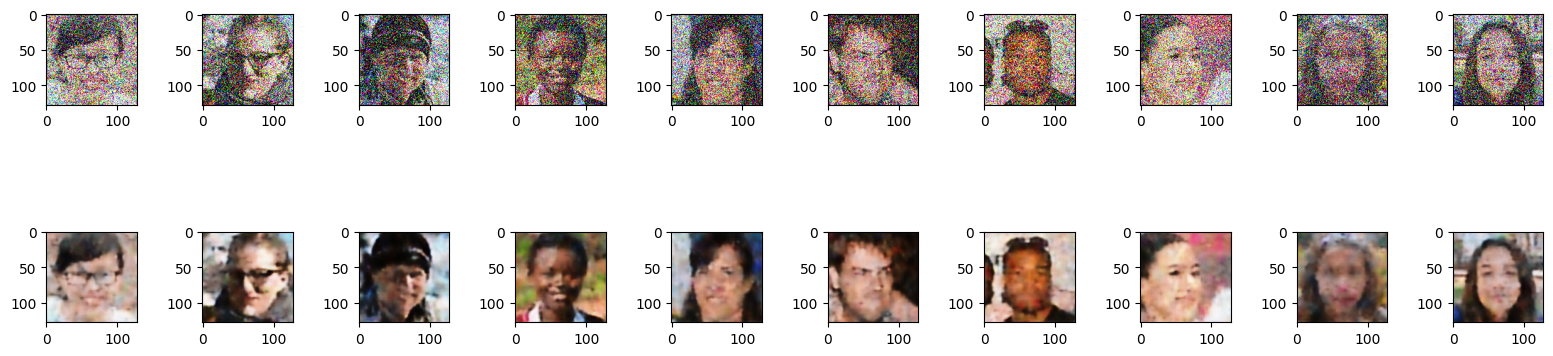

In [197]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test_noisy[i])

    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i])

plt.show()

## Visualization of the reconstructed images!

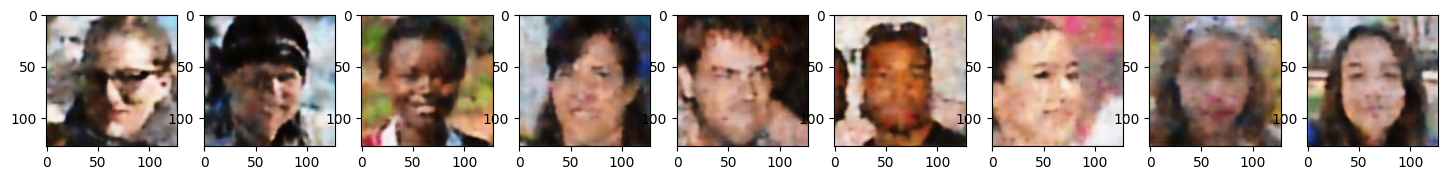

In [195]:
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(no_noise_img[i])
plt.show()

## Some remarks:
- This is the best result i got
- I applied Batch Normalization, LeakyRelu and dynamic scheduler but the images needs a more accurate reconstruction!
- This was done with a subset of the original dataset due to the heavy data load